<a href="https://colab.research.google.com/github/Anjali-Saravanan/Monte-Carlo/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 
  
INTERVAL= 1000
  
circle_points= 0
square_points= 0
  
# Total Random numbers generated= possible x 
# values* possible y values 
for i in range(INTERVAL**2): 
  
    # Randomly generated x and y values from a 
    # uniform distribution 
    # Rannge of x and y values is -1 to 1 
    rand_x= random.uniform(-1, 1) 
    rand_y= random.uniform(-1, 1) 
  
    # Distance between (x, y) from the origin 
    origin_dist= rand_x**2 + rand_y**2
  
    # Checking if (x, y) lies inside the circle 
    if origin_dist<= 1: 
        circle_points+= 1
  
    square_points+= 1
  
    # Estimating value of pi, 
    # pi= 4*(no. of points generated inside the  
    # circle)/ (no. of points generated inside the square) 
    pi = 4* circle_points/ square_points 
  
##    print(rand_x, rand_y, circle_points, square_points, "-", pi) 
##    print("\n") 
  
print("Final Estimation of Pi=", pi)  

----------------------
1000000 drops
pi estimated as:
	3.140452
----------------------


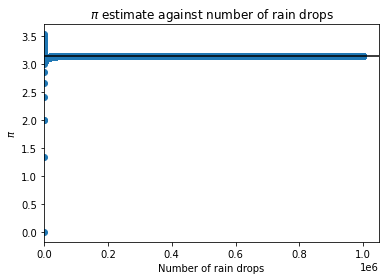

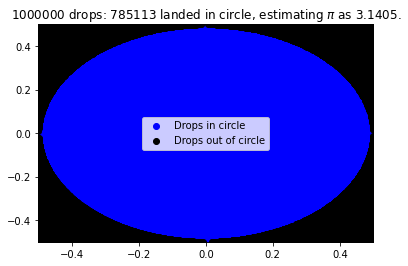

In [2]:
from __future__ import division
from random import random
from math import pi
import matplotlib.pyplot as plt
"""
Script to simulate rain in a square field. Counting the number of rain drops in the inscribed circle of radius equal to the length of the field. The ratio of the number of drops in the circle to the total number of drops gives $\pi$.
"""


def rain_drop(length_of_field=1):
    """
    Simulate a random rain drop
    """
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]


def is_point_in_circle(point, length_of_field=1):
    """
    Return True if point is in inscribed circle
    """
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2


def plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):
    """ Function to draw rain drops """
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    plt.scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    plt.legend(loc="center")
    plt.title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    plt.savefig("%s_drops.%s" % (number_of_drops, format))


def rain(number_of_drops=1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        if dynamic:  # The dynamic option if set to True will plot every new drop (this can be used to create animations of the simulation)
            print ("Plotting drop number: %s" % (k + 1))
            plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.
    # Plot the pi estimates
    plt.figure()
    plt.scatter(range(1, number_of_drops + 1), pi_estimate)
    max_x = plt.xlim()[1]
    plt.hlines(pi, 0, max_x, color='black')
    plt.xlim(0, max_x)
    plt.title("$\pi$ estimate against number of rain drops")
    plt.xlabel("Number of rain drops")
    plt.ylabel("$\pi$")
    plt.savefig("Pi_estimate_for_%s_drops_thrown.pdf" % number_of_drops)

    if plot and not dynamic:
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of drops
        plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)

    return [number_of_drops_in_circle, number_of_drops]


if __name__ == "__main__":
    # Run the script from cli
    from sys import argv
    number_of_drops = 1000000
   # if len(argv) > 1:  # If an argument is passed then change number of drops to be simulated.
        #number_of_drops = eval(argv[1])
    #  Two sets of simulations (comment out the unwanted one).
    #r = rain(number_of_drops, plot=True, format='png', dynamic=True)
    r = rain(number_of_drops, plot=True, format='png', dynamic=False)
    # Print to screen:
    print ("----------------------")
    print ("%s drops" % number_of_drops)
    print( "pi estimated as:")
    print( "\t%s" % (4 * r[0] / r[1]))
    print( "----------------------")